# Face Recognition with SVM

## specs recognition with lfw faces dataset 

In [31]:
from sklearn.datasets import fetch_lfw_people
data = fetch_lfw_people(min_faces_per_person=60)

In [32]:
images = data.images
labels = data.target

images.shape, labels.shape

((1348, 62, 47), (1348,))

In [33]:
data.target_names[6]

'Junichiro Koizumi'

In [34]:
X = images.reshape(-1,62*47)
y = labels

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15, whiten=True, random_state=7)


X_train_pca = pca.fit_transform(X_train)
X_test_pca  = pca.transform(X_test)

In [36]:
pca.explained_variance_ratio_[:].sum()

0.6940827

In [37]:
from sklearn.svm import SVC
model = SVC(kernel="rbf")

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'C': [.01, 0.5, 1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005] }

grid = GridSearchCV(model, param_grid)

In [39]:
%timeit grid.fit(X_train_pca, y_train)

6.65 s ± 67 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
grid.best_params_

{'C': 50, 'gamma': 0.005}

In [41]:
best_model = grid.best_estimator_

predictions = best_model.predict(X_test_pca)
actuals      = y_test

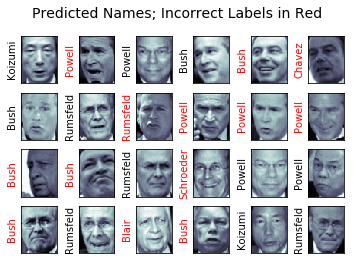

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):

    axi.imshow( X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel( data.target_names[ predictions[i] ].split()[-1], color='black' if actuals[i] == predictions[i] else 'red')
    
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [43]:
from sklearn.metrics import classification_report
print(classification_report(actuals, predictions, target_names=data.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.40      0.14      0.21        29
     Colin Powell       0.67      0.71      0.69        70
  Donald Rumsfeld       0.56      0.67      0.61        33
    George W Bush       0.71      0.79      0.75       126
Gerhard Schroeder       0.30      0.29      0.29        21
      Hugo Chavez       0.58      0.39      0.47        18
Junichiro Koizumi       0.70      0.70      0.70        10
       Tony Blair       0.48      0.50      0.49        30

      avg / total       0.61      0.63      0.61       337



## Face recognition with olivetti faces dataset

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces()
dir(data)

['DESCR', 'data', 'images', 'target']

In [18]:
images = data.images
labels = data.target


images.shape, labels.shape

((400, 64, 64), (400,))

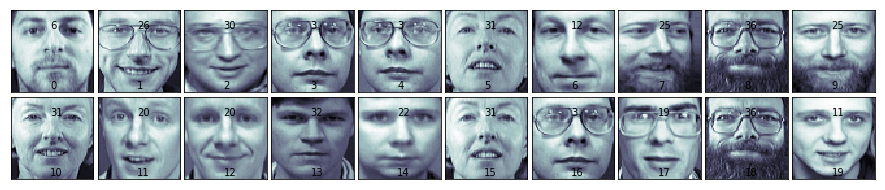

In [19]:
def show_image(images, label, how_many=5):


    ##set up figure size in inches
    fig=plt.figure(figsize=(12,12))
    fig.subplots_adjust(left=0 , right=1 ,bottom=0, top=1, hspace=0.05,wspace=0.05)
    from random import randint

    for  i in range(how_many):
        #we will print images in matrix 10,10
        index = randint(0,images.shape[0])

        p = fig.add_subplot(10,10, i + 1 ,xticks=[],yticks=[])

        p.imshow( images[index], cmap=plt.cm.bone)
        #label the image with target value
        p.text(30, 14, str( label[index] ))
        p.text(30, 60, str(i))
        
show_image(images, labels, how_many=20)

In [20]:
from sklearn.svm import SVC
model_linear_kernel = SVC( kernel="linear")

In [21]:
images = images.reshape(-1, 64*64)

images = images / 255

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( images, labels, test_size=0.25, random_state=7)

In [23]:
model_linear_kernel.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
model_linear_kernel.score(X_test, y_test)

0.0

In [25]:
index_with_glasses = [
	(10, 19), (30, 32), (37, 38), (50, 59), (63, 64),
	(69, 69), (120, 121), (124, 129), (130, 139), (160, 161),
	(164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
	(194, 194), (196, 199), (260, 269), (270, 279), (300, 309),
	(330, 339), (358, 359), (360, 369)
]

In [26]:
y = np.zeros(labels.shape)

for start, end in index_with_glasses:

    y[start: end + 1] = 1

#confirm for yourself
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
X_train, X_test, y_train, y_test = train_test_split( images, y, test_size=0.25, random_state=7 )

In [28]:
model_linear_kernel = SVC(kernel = "linear" )
model_linear_kernel.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

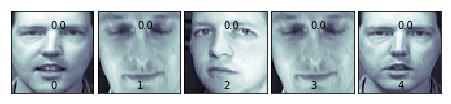

In [29]:
show_image( X_test.reshape(-1,64,64), y_test )

In [30]:
model_linear_kernel.score(X_test, y_test)

0.65